# Problem Statement

This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

- 2 yr experience, 9 test score, 6 interview score

- 12 yr experience, 10 test score, 10 interview score

In [41]:
import pandas as pd
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv"

df = pd.read_csv(url)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [2]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [42]:
df.to_csv("hiring.csv", index=False)

In [3]:
# Fill NaN in the experience column with 0
df["experience"] = df.experience.fillna(0)
df.T

,0,1,2,3,4,5,6,7
experience,0,0,five,two,seven,three,ten,eleven
test_score(out of 10),8.0,8.0,6.0,10.0,9.0,7.0,NaN,7.0
interview_score(out of 10),9,6,7,10,6,10,7,8
salary($),50000,45000,60000,65000,70000,62000,72000,80000


In [4]:
df.isna().sum()

experience                    0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [5]:
# Replace NaN in test score to 0. 
# Perhaps they didn't take the test

df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(0)
df.isna().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [ ]:
from word2number import w2n

# Convert all number in words to digits
def word_to_num(val):
    if type(val) == str:
        return w2n.word_to_num(val)
    return val

df["experience"] = df["experience"].apply(word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,0.0,7,72000
7,11,7.0,8,80000


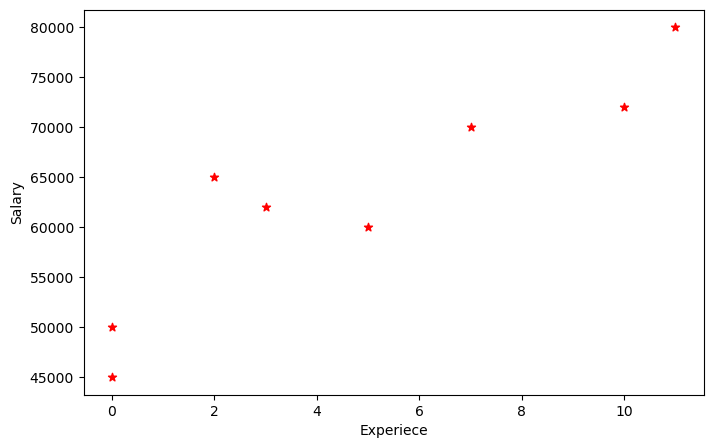

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))


plt.xlabel("Experiece")
plt.ylabel("Salary")
plt.scatter(df.experience, df["salary($)"], marker= "*", color="red")
plt.show()

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


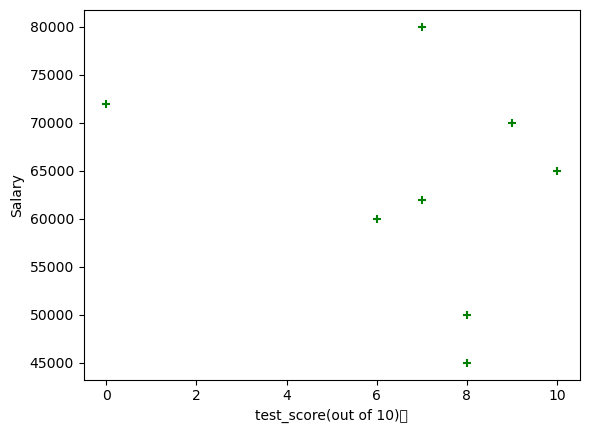

In [17]:
plt.xlabel("test_score(out of 10)	")
plt.ylabel("Salary")
plt.scatter(df["test_score(out of 10)"], df["salary($)"], marker= "+", color="green")
plt.show()

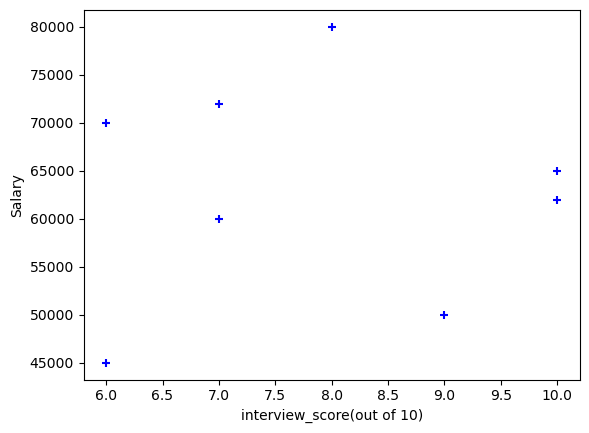

In [19]:
plt.xlabel("interview_score(out of 10)")
plt.ylabel("Salary")
plt.scatter(df["interview_score(out of 10)"], df["salary($)"], marker= "+", color="blue")
plt.show()

In [21]:
x = df.drop("salary($)", axis="columns")
y = df["salary($)"]

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [30]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
reg_model.score(x_train, y_train)

0.9815450040282133

In [31]:
reg_model.score(x_test, y_test)

0.12726957412576312

Generalization in the above is bad because of the small size of the dataset.

In [ ]:
r_model = LinearRegression()
r_model.fit(x,y)
r_model.score(x,y)

0.9718156538228174

In [37]:
reg_model.predict([[2,9,6]])

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50547.46742637])

In [38]:
r_model.predict([[2,9,6]])

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52688.25222797])

In [39]:
reg_model.predict([[12,10,10]])

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91421.65570405])

In [40]:
r_model.predict([[12,10,10]])

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92940.63332619])